In [11]:
%load_ext autoreload
%autoreload 2

from ga.fitness import numba_mean_log_prob_fitness
from data.digits import load_dataset
from ga.selection import  rank_selection_factory
from ga.mutation import numba_constant_uniform_mutation2, delete_random_emission_symbols
from ga.crossover import uniform_crossover, uniform_states_crossover, rank_weighted
from ga.numba_ga import GaHMM
from hmm.bw_numba import multiple_observation_sequences_from_ndarray_list
from hmm.bw_numba import calc_mean_log_prob
import numpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
training_data = load_dataset(dataset='train')
digit = 0
n_samples = 12
samples = training_data[digit][:n_samples]

# def observation_sequences(n_symbols):
#     sequences = []
#     n_sequences = 10
#     min_seq_length = 15
#     max_seq_length = 500

#     for i in range(n_sequences):
#         seq_length = numpy.random.randint(low=min_seq_length, high=max_seq_length)
#         rand_sequence = numpy.random.randint(low=0, high=n_symbols, size=seq_length)
#         sequences.append(rand_sequence)

#     res = multiple_observation_sequences_from_ndarray_list(sequences)
#     return res


observations = multiple_observation_sequences_from_ndarray_list(samples)

gabw = GaHMM(
        n_symbols=128,
        n_states=4,
        population_size=13,
        n_generations=100
    )

# observations = observation_sequences(128)
gabw.fitness_func = numba_mean_log_prob_fitness(observations)
gabw.mutation_func = numba_constant_uniform_mutation2(mutation_threshold=0.001)
# gabw.mutation_func = delete_random_emission_symbols(n_zeros=1)
gabw.crossover_func = rank_weighted(uniform_crossover)
gabw.parent_select_func = rank_selection_factory(gabw.population_size)

gabw.train_population_with_baum_welch(observations, 1)
# gabw.start()
# gabw.plot()

shish


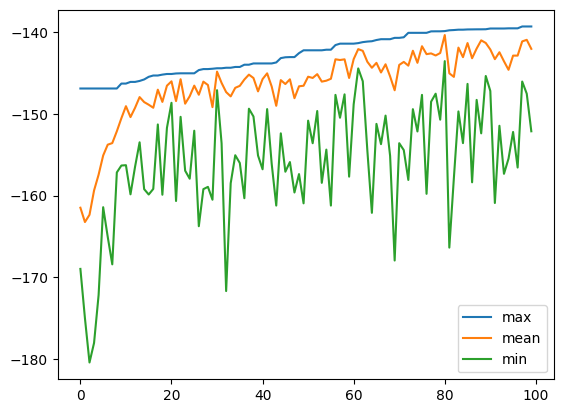

In [15]:
gabw.start()
# gabw.plot()
print('shish')
gabw.plot()

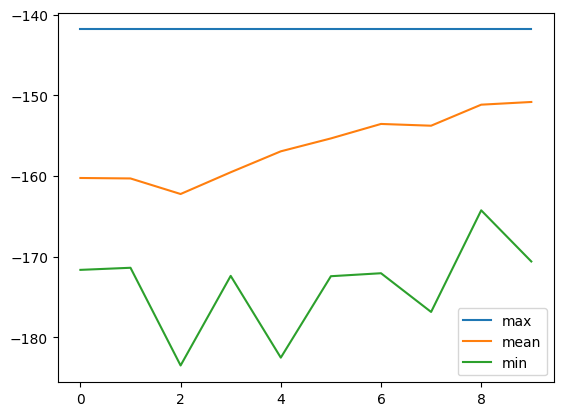

In [ ]:
gabw.plot()